# Lab 2 

## Ridge and Lasso with California housing dataset

### Getting the data

In [18]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Missing and Duplicated

In [4]:
print(f'Total missing values in the dataset {df.isnull().sum().sum()}')
print(f'Total number of duplicated values {len(df[df.duplicated()])}')

Total missing values in the dataset 0
Total number of duplicated values 0


In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Correlation matrix

In [6]:
ere = df.drop(['Latitude', 'Longitude'],axis=1)

<Axes: >

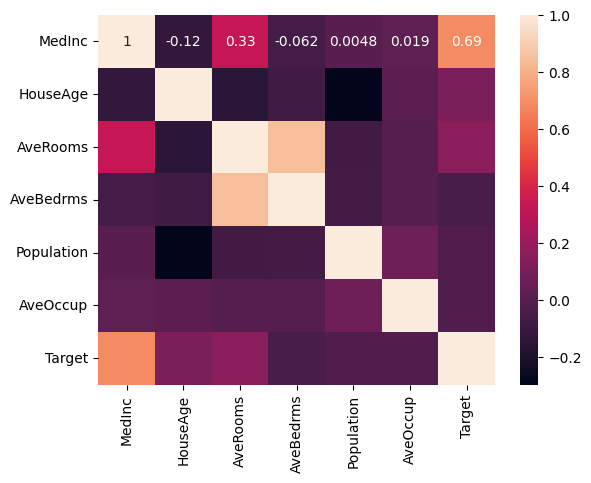

In [7]:
sns.heatmap(ere.corr(), annot=True)

### Boxplots

<Axes: >

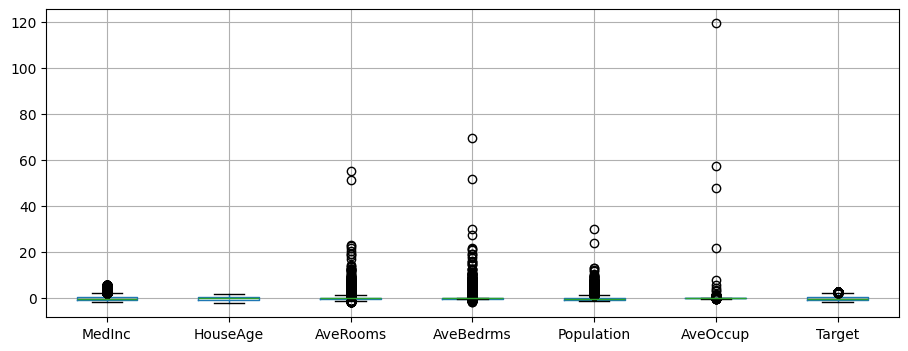

In [12]:
kk = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Target']]
kk = (kk - kk.mean())/kk.std()
kk.boxplot(figsize=(11,4))

### Handling outliers

In [13]:
tot = len(df)
for i in df.drop(['Latitude', 'Longitude'],axis=1):
    df[i] = (df[i] - df[i].mean())/df[i].std()
    dk = df[np.abs(df[i])<2.5]
    print(f'Removed {len(df) - len(dk)} outliers from column {i}')
    df=dk

Removed 477 outliers from column MedInc
Removed 0 outliers from column HouseAge
Removed 151 outliers from column AveRooms
Removed 492 outliers from column AveBedrms
Removed 484 outliers from column Population
Removed 10 outliers from column AveOccup
Removed 702 outliers from column Target


/tmp/ipykernel_221722/836813683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = (df[i] - df[i].mean())/df[i].std()


In [14]:
print(f'Total before outlier removal = {tot}\nTotal after outlier removal = {len(df)}')

Total before outlier removal = 20640
Total after outlier removal = 18324


### Histogram

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

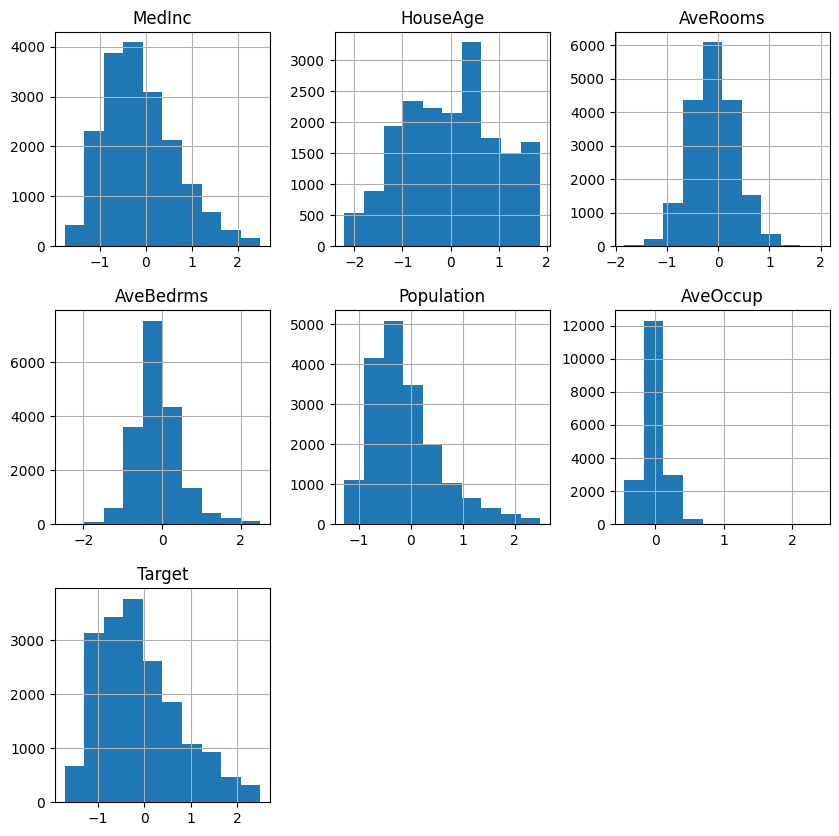

In [15]:
df.drop(['Latitude', 'Longitude'], axis=1).hist(figsize=(10,10))

### Scatter plot with respect to target

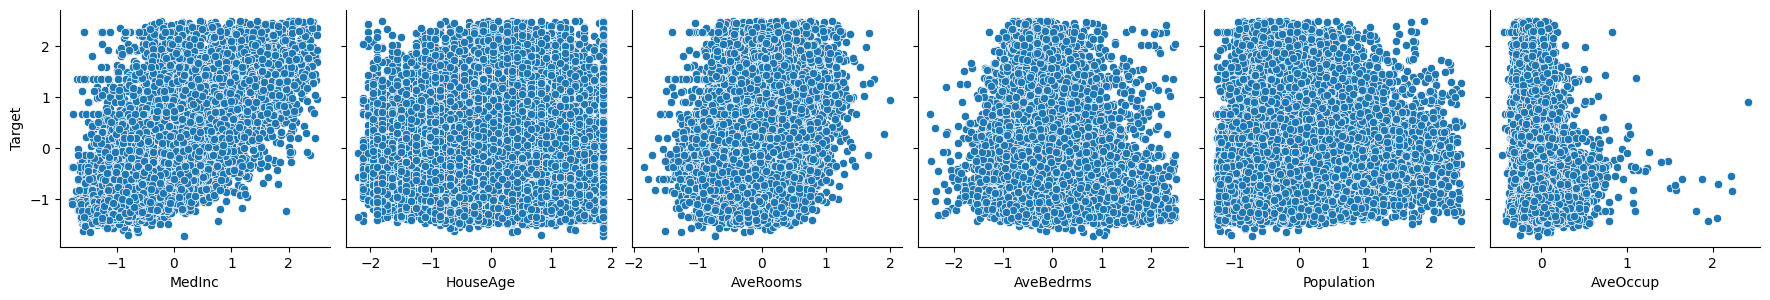

In [16]:
sns.pairplot(df, x_vars=df.drop(['Latitude','Longitude', 'Target'],axis=1).columns, y_vars='Target', height=3)

/home/manax/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


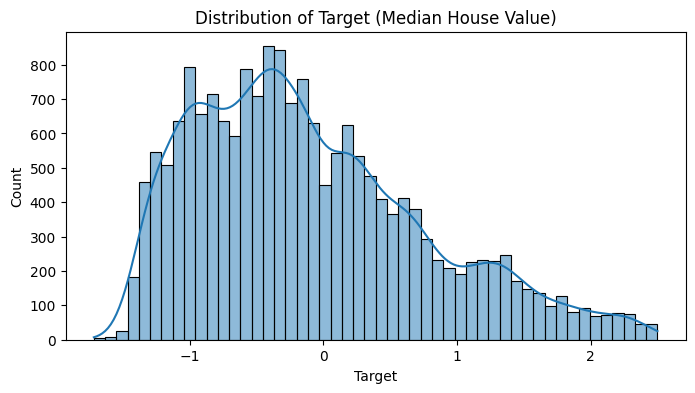

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Target'], bins=50, kde=True)
plt.title("Distribution of Target (Median House Value)")
plt.show()

## Model building

### Train Test Split

In [21]:
for i in ['Latitude', 'Longitude']:
    df[i] = (df[i] - df[i].mean())/df[i].std()

In [23]:
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.344709,0.985076,0.655513,-0.3277,-0.996402,-0.093467,1.050675,-1.325862,2.297621


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Target',axis=1), df['Target'], test_size=0.2, random_state=42)


### Models

In [51]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)


In [52]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)


In [53]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)


### Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': np.linspace(0.1, 10, 100)}
ridge_cv = GridSearchCV(ridge_reg, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

lasso_params = {'alpha': np.linspace(0.000001, 10, 100)}
lasso_cv = GridSearchCV(lasso_reg, lasso_params, cv=5)
lasso_cv.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_cv.best_params_)
print("Best Lasso alpha:", lasso_cv.best_params_)


Best Ridge alpha: {'alpha': 1.9000000000000001}
Best Lasso alpha: {'alpha': 1e-06}


### Model Evaluation

In [54]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, r2, mae

rmse_linear, r2_linear, mae_linear = evaluate_model(y_test, y_pred_linear)

rmse_ridge, r2_ridge, mae_ridge = evaluate_model(y_test, ridge_cv.predict(X_test))

rmse_lasso, r2_lasso, mae_lasso = evaluate_model(y_test, lasso_cv.predict(X_test))

print(f"Linear Regression: RMSE = {rmse_linear}, R² = {r2_linear}, MAE = {mae_linear}")
print(f"Ridge Regression: RMSE = {rmse_ridge}, R² = {r2_ridge}, MAE = {mae_ridge}")
print(f"Lasso Regression: RMSE = {rmse_lasso}, R² = {r2_lasso}, MAE = {mae_lasso}")


Linear Regression: RMSE = 0.5256441593082106, R² = 0.6316668607176297, MAE = 0.39679611488648275
Ridge Regression: RMSE = 0.5256501571099035, R² = 0.6316584550245727, MAE = 0.3967861591338245
Lasso Regression: RMSE = 0.525644178527293, R² = 0.6316668337829632, MAE = 0.39679601318688085


In [62]:
y_pred_lasso = lasso_cv.predict(X_test)
y_pred_lasso = (y_pred_lasso*y_pred_lasso.std())+y_pred_lasso.mean()
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_ridge = (y_pred_ridge*y_pred_ridge.std())+y_pred_ridge.mean()
y_pred_linear = (y_pred_linear*y_pred_linear.std())+y_pred_linear.mean()


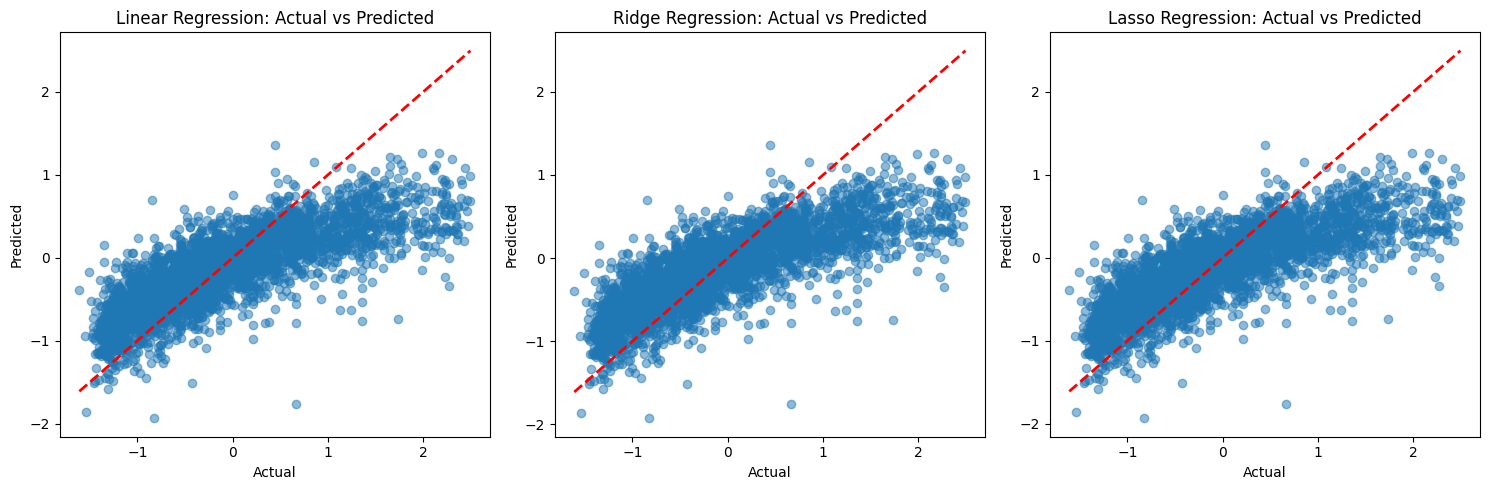

In [63]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()
